In [ ]:
# scatterplot scores and K-S for each feature and overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

In [2]:
np.random.seed(499)

In [156]:
real_train = pd.read_csv("data_120_2_train.csv")
real_test = pd.read_csv("data_120_2_test.csv")
timegan = pd.read_csv("timegan_32_50_2000.csv")
deepecho = pd.read_csv("deepEcho_120_4000epoch.csv")
ehrmgan = pd.read_csv("ehrMGAN39.csv")
corgan = pd.read_csv("corgan2.csv")
ctgan = pd.read_csv("CTGAN.csv")
doppel = pd.read_csv("gendoppel1.csv")
pate = pd.read_csv("patenew.csv")

In [157]:
def taken(data):
    ids=list(set(data["hadm_id"]))[-len(set(real_test["hadm_id"])):]
    return data[data["hadm_id"].isin(ids)]

In [158]:
deepecho=taken(deepecho)
timegan=taken(timegan)
ehrmgan=taken(ehrmgan)
corgan=taken(corgan)
ctgan=taken(ctgan)
doppel=taken(doppel)
pate=taken(pate)

In [60]:
# bernoulliSuccessProbability
def BSP(data):
    #Number of patients who had the disease / procedure Total number of patients
    return data.groupby(['hour']).sum()/len(data[data["hour"]==0])
    
def KLDivergence(data1,data2):
    p = BSP(data1)
    q = BSP(data2)
    p.replace(to_replace = 0, value = 0.000001, inplace=True) # replace with small value
    q.replace(to_replace = 0, value = 0.000001, inplace=True) # replace with small value
    return abs(p*np.log(p/q))

def scatterplot(data1, data2, title):
    d1=BSP(data1).to_numpy().flatten()
    d2=BSP(data2).to_numpy().flatten()
    
    cc, p = stats.pearsonr(d1, d2)
    
    df = pd.DataFrame({'real':d1, 'synthetic':d2})

    plot = sns.regplot(data=df, x="real", y="synthetic",
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
    plot.set(title=title)
    plt.text(0.6,0.05,"CC: "+str(round(cc,3)), horizontalalignment='left', size='large', color='black', weight='semibold')
    plt.savefig(title+".png")
    plt.show()

    

In [ ]:
df[column_name] / df[column_name].sum()

In [188]:
(r1.groupby(["hour"]).mean()["CBC"]/r1.groupby(["hour"]).mean()["CBC"].sum()).values

array([0.06351551, 0.06610044, 0.0760709 , 0.0620384 , 0.0372969 ,
       0.04357459, 0.03803545, 0.03471196, 0.02067947, 0.05317578,
       0.02104874, 0.01181684, 0.01218612, 0.01698671, 0.01033973,
       0.00886263, 0.00997046, 0.00886263, 0.00812408, 0.01144756,
       0.01329394, 0.02252585, 0.02584934, 0.01957164, 0.00997046,
       0.00849335, 0.0077548 , 0.00480059, 0.00590842, 0.00516987,
       0.00480059, 0.01070901, 0.01144756, 0.01329394, 0.01957164,
       0.02400295, 0.0062777 , 0.00738552, 0.00664697, 0.00369276,
       0.00480059, 0.00332349, 0.00553914, 0.00701625, 0.00886263,
       0.01107829, 0.02474151, 0.02104874, 0.00849335, 0.00480059,
       0.00590842, 0.00332349, 0.0014771 , 0.00184638, 0.00258493,
       0.00516987, 0.00406204, 0.00516987, 0.00923191, 0.0155096 ])

In [198]:
def kl_divergence(p, q):
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-10
    p = np.asarray(p) + epsilon
    q = np.asarray(q) + epsilon
    return np.sum(p * np.log(p / q))

def KLDivergence(df1, df2):
    # Initialize an empty DataFrame to store KL Divergence results
    kl_divergence_results = pd.DataFrame(columns=["Feature", "KL Divergence"])
    # Iterate over columns (features) in the dataframes
    for feature in df1.columns[1:]:
        p = ((df1.groupby(["hour"]).mean()[feature]+1e-10)/(df1.groupby(["hour"]).mean()[feature].sum()+1e-10)).values
        q = ((df2.groupby(["hour"]).mean()[feature]+1e-10)/(df2.groupby(["hour"]).mean()[feature].sum()+1e-10)).values
        
        kl_div = kl_divergence(p, q)
        
        kl_divergence_results = pd.concat([kl_divergence_results, pd.DataFrame({"Feature": [feature], "KL Divergence": [kl_div]})], ignore_index=True)

    return kl_divergence_results


In [63]:
r1 = real_test.drop(["hadm_id"], axis=1)
r2 = real_train.drop(["hadm_id"], axis=1)

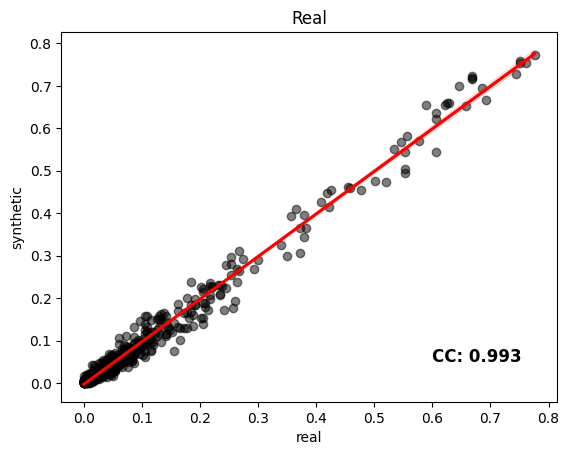

In [64]:
scatterplot(r1, r2, "Real")

In [133]:
t1 = timegan.drop(["hadm_id"], axis=1)
d1 = deepecho1.drop(["hadm_id"], axis=1)
e1 = ehrmgan.drop(["hadm_id"], axis=1)
co1 = corgan.drop(["hadm_id"], axis=1)
ct1 = ctgan.drop(["hadm_id"], axis=1)
do1 = doppel.drop(["hadm_id"], axis=1)
p1 = pate.drop(["hadm_id"], axis=1)

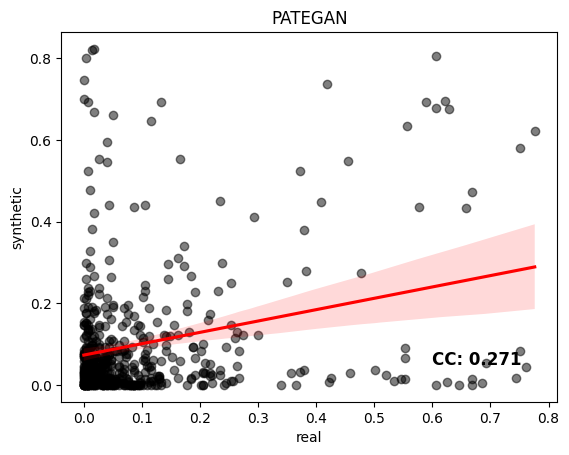

In [134]:
scatterplot(r1, p1, "PATEGAN")

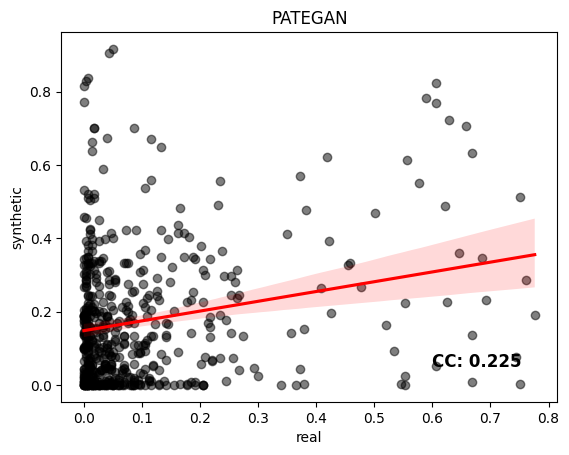

In [130]:
scatterplot(r1, p1, "PATEGAN")

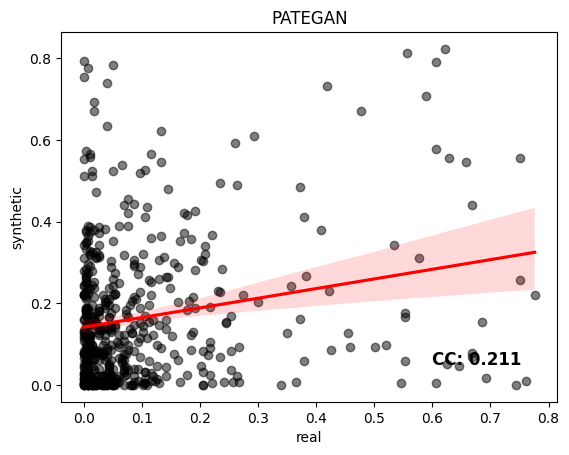

In [124]:
scatterplot(r1, p1, "PATEGAN")

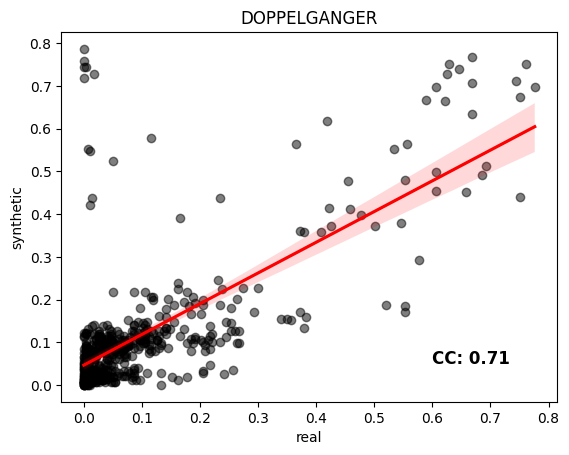

In [47]:
scatterplot(r1, d1, "DOPPELGANGER")

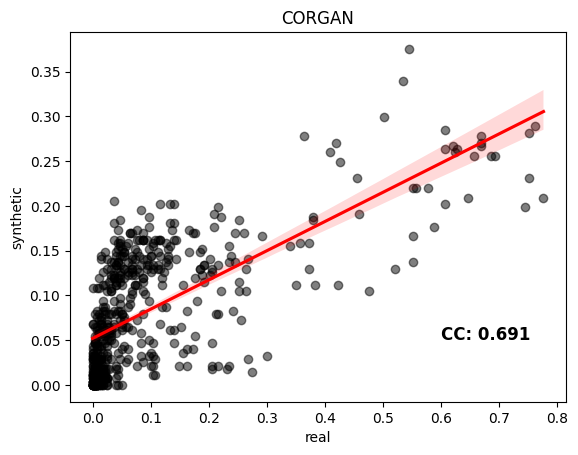

In [45]:
scatterplot(r1, co1, "CORGAN")

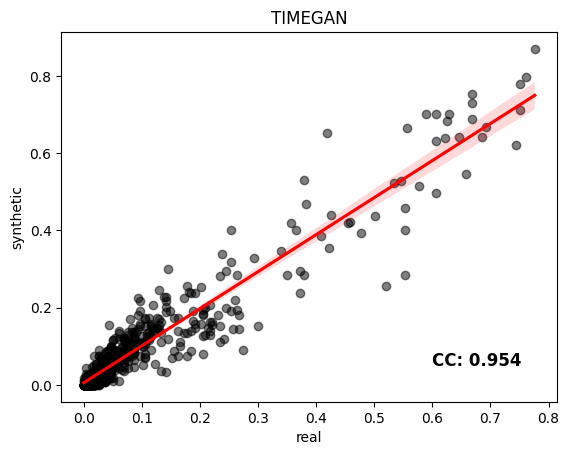

In [42]:
scatterplot(r1, t1, "TIMEGAN")

In [25]:
r1

,hour,Blood Products,Electrolytes,Insulin,CBC,Urinalysis,Antibiotics,ABG,Calcium,Glucose
0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0
2,4,0,1,0,1,0,0,1,1,1
3,6,0,1,0,1,0,0,1,1,1
4,8,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16615,110,0,0,0,0,0,0,0,0,0
16616,112,0,0,0,0,0,0,0,0,0
16617,114,0,0,0,0,0,0,0,0,0
16618,116,0,0,0,0,0,0,0,0,0


In [ ]:
t1 = timegan.drop(["hadm_id"], axis=1)
d1 = deepecho1.drop(["hadm_id"], axis=1)
e1 = ehrmgan.drop(["hadm_id"], axis=1)
co1 = corgan.drop(["hadm_id"], axis=1)
ct1 = ctgan.drop(["hadm_id"], axis=1)
do1 = doppel.drop(["hadm_id"], axis=1)
p1 = pate.drop(["hadm_id"], axis=1)

In [152]:
KLDivergence(r1,t1)

KeyError: 'hour'

In [200]:
timekld = KLDivergence(r1,t1)
deepkld = KLDivergence(r1,d1)
ehrkld = KLDivergence(r1,e1)
corkld = KLDivergence(r1,co1)
ctkld = KLDivergence(r1,ct1)
doppelkld = KLDivergence(r1,do1)
patekld = KLDivergence(r1,p1)


In [208]:
timekld["TIMEGAN"] = timekld["KL Divergence"]
deepkld["DEEPECHO"] = deepkld["KL Divergence"]
ehrkld["EHRMGAN"] = ehrkld["KL Divergence"]
corkld["CORGAN"] = corkld["KL Divergence"]
ctkld["CTGAN"] = ctkld["KL Divergence"] 
doppelkld["DOPPELGANGER"] = doppelkld["KL Divergence"]  
patekld["PATEGAN"] = patekld["KL Divergence"]

In [106]:
list(p1.columns)

['hour',
 'Blood Products',
 'Electrolytes',
 'Insulin',
 'CBC',
 'Urinalysis',
 'Antibiotics',
 'ABG',
 'Calcium',
 'Glucose']

In [168]:
# combine into one table

In [209]:
table = pd.concat([timekld["TIMEGAN"], deepkld["DEEPECHO"], ehrkld["EHRMGAN"], corkld["CORGAN"], ctkld["CTGAN"], doppelkld["DOPPELGANGER"], patekld["PATEGAN"]], axis=1)#.transpose()
table.rename({0: 'hour', 1: 'Blood Products', 2: 'Eletrolytes', 3: "Insulin", 4:"CBC", 5:"Urinalysis", 6:"Antibiotics", 7:"ABG", 8:"Calcium", 9:"Glucose"},inplace=True)
table=table.drop(["hour"])

In [210]:
table=table.abs()

In [215]:
table=table.round(3)

In [216]:
table.to_csv("kldivergence.csv")

In [211]:
table.sum(axis=0).round(3).values

array([ 5.328, 12.35 , 61.593,  9.473, 22.226,  3.668, 23.15 ])

In [136]:
table

,TIMEGAN,DEEPECHO,EHRMGAN,CORGAN,CTGAN,DOPPELGANGER,PATEGAN,Mean
hour,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Blood Products,4190.704869,4259.782422,4259.782422,4259.782422,4259.782422,3960.446359,3131.515720,NaN
Eletrolytes,44163.582083,49850.967264,49850.967264,49850.967264,46903.658346,51370.673427,65416.442497,NaN
Insulin,18489.758297,19387.766484,19387.766484,19387.766484,17545.698409,17246.362343,17683.853511,NaN
CBC,43541.884109,45222.771226,45222.771226,45222.771226,42275.462308,43795.168470,58508.687218,NaN
Urinalysis,2302.585093,2279.559242,2279.559242,2279.559242,2302.585093,2141.404135,2164.429986,NaN
Antibiotics,15335.216719,16624.664372,16624.664372,16624.664372,14851.673850,13976.691511,13354.993536,NaN
ABG,28344.822495,35943.353304,35943.353304,35943.353304,29496.115043,33617.742358,33871.026719,NaN
Calcium,30716.485140,36058.482558,36058.482558,36058.482558,32351.320558,32512.501513,27746.150369,NaN
Glucose,41768.893587,45430.003885,45430.003885,45430.003885,41676.790184,45245.797079,62676.366237,NaN


In [172]:
abs(round(table[[ 'Urinalysis','Blood Products', 'Insulin',"Glucose","Calcium","ABG","Antibiotics","CBC","Electrolytes", 'AVERAGE']],3))
      
      

,Urinalysis,Blood Products,Insulin,Glucose,Calcium,ABG,Antibiotics,CBC,Electrolytes,AVERAGE
TimeGAN,0.005,0.312,0.282,0.006,0.001,0.450,0.183,0.264,0.319,0.057
DeepEcho,0.079,0.116,0.065,0.171,0.252,0.413,0.097,0.247,0.448,0.109
EHR-M-GAN,2.850,4.112,7.521,14.476,7.374,8.281,2.494,12.134,12.167,8.376


In [123]:
round(table[[ 'Urinalysis','07-Blood Products', '06-Insulin (Non IV)',"Glucose","Calcium","ABG","08-Antibiotics","CBC","Electrolytes", 'AVERAGE']],3)
      
      
      

KeyError: "['07-Blood Products', '06-Insulin (Non IV)', '08-Antibiotics'] not in index"

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(data1, data2)